In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_excel('data/nbd_in.xlsx')
display(df.head())

,Статус,Дата создания,Дата нарушения,Вид нарушения,Дорога,Отделение,Станция,Тип организации,Наименование организации,"Служба, дирекция, региональный центр",Подразделение,Предприятие подразделения,Классификация МинТранс,Доп. отм.
0,действующий,2022-08-26,2022-08-26,События по п. 5,Свердловская,РЕГ-4,КОНДА - КОММУНИСТИЧЕСКАЯ,Функциональный Филиал,ФФ ЦТ,Т СВЕРД,ТЧЭ-12 (СЕРОВ-СОРТ),NaN,"Повреждение или отказ локомотива, вызвавшие вы...",тех. заключение
1,действующий,2022-08-26,2022-08-26,События по п. 5,Свердловская,РЕГ-3,ЗАВОДОУКОВСКАЯ,Сторонняя организация,Сторонняя организация,NaN,"ООО ""Вагонное депо Балахонцы"" (СОЛИКАМСК II)",NaN,Отцепка вагона от грузового поезда в пути след...,тех. заключение
2,действующий,2022-08-13,2022-08-13,События по п. 5,Свердловская,РЕГ-3,ТУРИНСКИЙ - КАРТЫМСКАЯ,Сторонняя организация,Сторонняя организация,"ООО ""ЛОКОТЕХ-СЕРВИС""",СЛД-67 Тюмень (СЛД-35 СВЕРД),NaN,"Повреждение или отказ локомотива, вызвавшие вы...",тех. заключение
3,действующий,2022-08-10,2022-08-10,События по п. 5,Свердловская,РЕГ-5,НИЖНЕВАРТОВСК I,Функциональный Филиал,ФФ ЦТ,Т СВЕРД,ТЧЭ-18 (СУРГУТ),NaN,Проезд железнодорожным подвижным составом запр...,тех. заключение
4,действующий,2022-08-10,2022-08-09,События по п. 4,Свердловская,РЕГ-1,СОЛИКАМСК,Функциональный Филиал,ФФ ЦД,Д СВЕРД,ДЦС-1 ПЕРМСКИЙ (ПЕРМЬ I),NaN,Сход железнодорожного подвижного состава при м...,тех. заключение


In [4]:
# import dtale
# df = pd.read_excel('data/nbd_in.xlsx')
# d = dtale.show(df)
# d

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Статус                                104 non-null    object        
 1   Дата создания                         104 non-null    datetime64[ns]
 2   Дата нарушения                        104 non-null    datetime64[ns]
 3   Вид нарушения                         104 non-null    object        
 4   Дорога                                104 non-null    object        
 5   Отделение                             104 non-null    object        
 6   Станция                               104 non-null    object        
 7   Тип организации                       104 non-null    object        
 8   Наименование организации              104 non-null    object        
 9   Служба, дирекция, региональный центр  78 non-null     object        
 10  По

Text(0.5, 1.0, 'Тепловая карта событий')

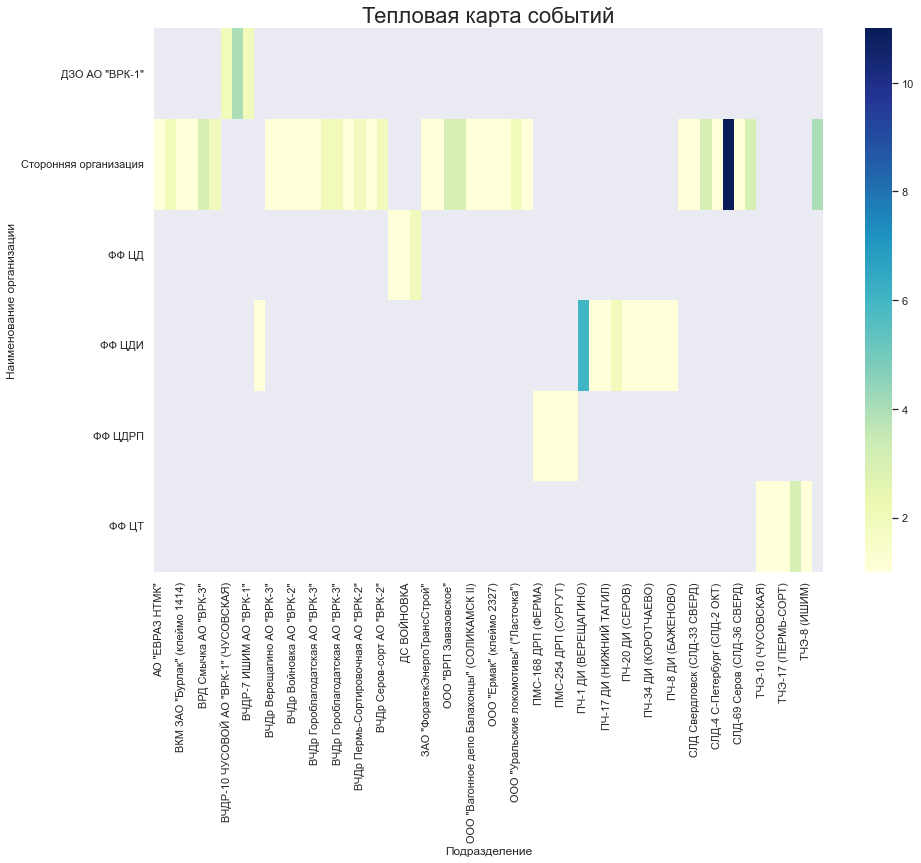

In [11]:

# построим сводную таблицу:
pivot=df.groupby(['Наименование организации','Подразделение'])['Дорога'].count().unstack()
# построим тепловую карту:
sns.set(rc = {'figure.figsize':(15,10)})
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта событий', fontsize=22)

In [ ]:
pivot=df.groupby(['Служба, дирекция, региональный центр','Подразделение'])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=1000, height=600)
fig.show()

In [ ]:
pivot=df.groupby(['Служба, дирекция, региональный центр','Тип организации'])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=500, height=900)
fig.show()

In [ ]:
pivot=df.groupby(['Подразделение','Дата нарушения'])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=1000, height=600)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='Дата нарушения')
fig.show()

In [14]:
df2 = pd.read_excel('data/nbd_2017_2021_sverd.xlsx')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Статус                                1305 non-null   object        
 1   Дата
создания                         1305 non-null   datetime64[ns]
 2   Дата
нарушения                        1305 non-null   datetime64[ns]
 3   Вид
нарушения                         1305 non-null   object        
 4   Дорога                                1305 non-null   object        
 5   Отделение                             1304 non-null   object        
 6   Станция                               1305 non-null   object        
 7   Тип организации                       1305 non-null   object        
 8   Наименование организации              1305 non-null   object        
 9   Служба, дирекция, региональный центр  963 non-null    object        
 10  

In [17]:
pivot=df.groupby(['Классификация МинТранс','Подразделение'])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=2000, height=600)
fig.show()

In [30]:
pivot=df2.groupby(['Классификация МинТранс','Подразделение'])['Дорога'].count().unstack()
#display (pivot)
#pivot=pivot[pivot['Классификация МинТранс']=='Излом рельса под железнодорожным подвижным составом']
#print(pivot[pivot['Классификация МинТранс']=='Излом рельса под железнодорожным подвижным составом'])
print(pivot['Классификация МинТранс'])
fig = px.imshow(pivot[pivot['Классификация МинТранс']=='Излом рельса под железнодорожным подвижным составом'], width=2000, height=600)
fig.show()

KeyError: 'Классификация МинТранс'

In [16]:
import plotly.express as px
fig = px.histogram(df2, x='Дата\nнарушения')
fig.show()

In [ ]:
pivot=df2.groupby(['Подразделение',df2['Дата\nнарушения'].dt.year])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=1000, height=1500)
fig.show()

In [ ]:
pivot=df2.groupby(['Служба, дирекция, региональный центр','Подразделение'])['Дорога'].count().unstack()
fig = px.imshow(pivot, width=2500, height=900)
fig.show()